In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Lasso Regression
from sklearn.linear_model import Lasso

# XGBoost Regression
from xgboost import XGBRegressor

# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("Dataset/gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Data visualization

sns.set()

In [10]:
# Finding the correlation in the dataset
# Positive correlation [Duration and calories column (Proportional relation)]
# Negative correlation [Indirect relation]

correlation = df.corr(numeric_only=True)

<Axes: >

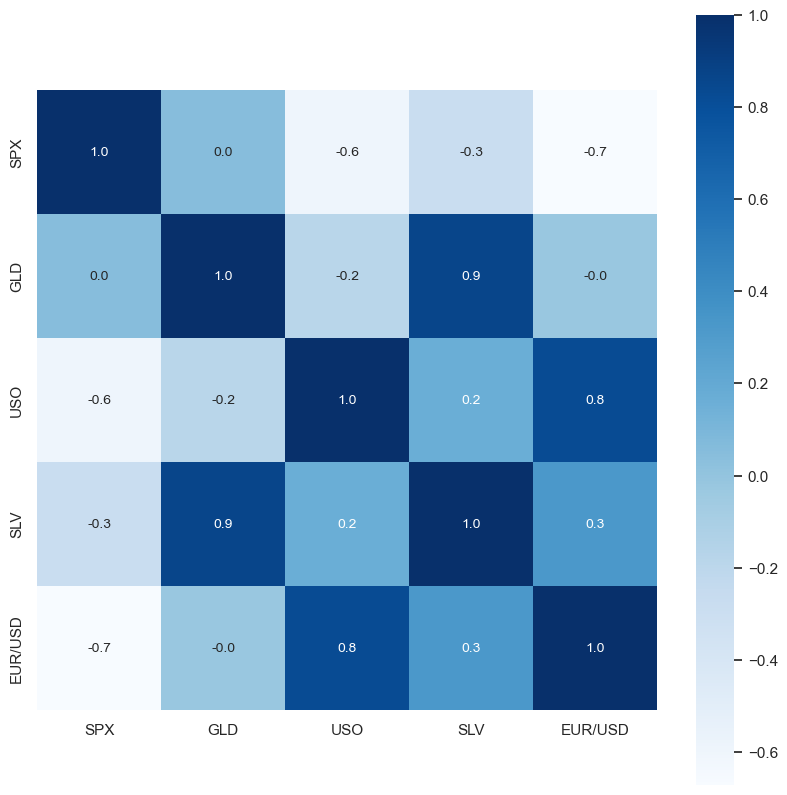

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':10}, cmap='Blues')

C:\Users\mdref\AppData\Local\Temp\ipykernel_8548\3672063586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SPX"])


<Axes: xlabel='SPX', ylabel='Density'>

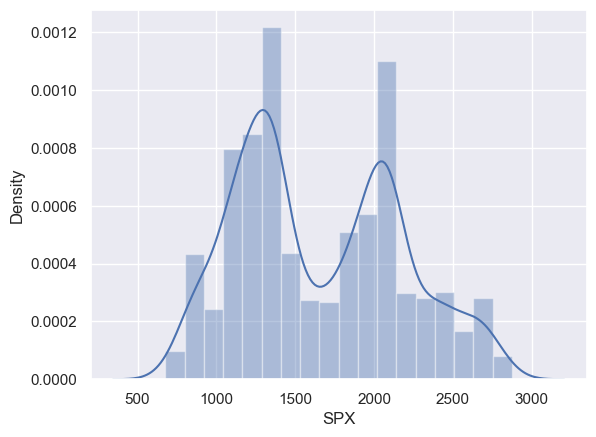

In [12]:
sns.distplot(df["SPX"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_8548\2193262130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"])


<Axes: xlabel='GLD', ylabel='Density'>

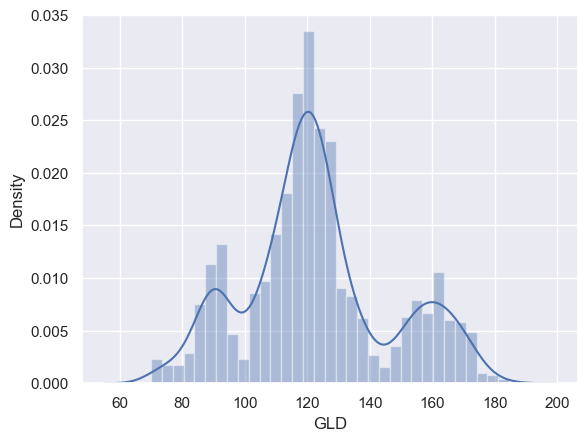

In [13]:
sns.distplot(df["GLD"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_8548\517324504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["USO"])


<Axes: xlabel='USO', ylabel='Density'>

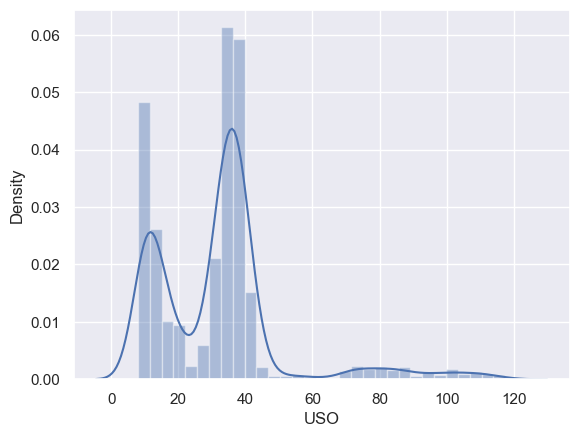

In [14]:
sns.distplot(df["USO"])

In [ ]:
sns.distplot(df["SLV"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_8548\3013485620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SLV"])


<Axes: xlabel='SLV', ylabel='Density'>

In [ ]:
sns.distplot(df["EUR/USD"])

In [ ]:
X = df.drop(columns=['Date','GLD'], axis=1)
Y = df["GLD"]

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# Model Training
model1 = LinearRegression()
model2 = Lasso()
model3 = XGBRegressor()

model4 = RandomForestRegressor(n_estimators = 200)

In [ ]:
model1.fit(X_train, Y_train)

In [ ]:
model2.fit(X_train, Y_train)

In [ ]:
model3.fit(X_train, Y_train)

In [ ]:
model4.fit(X_train, Y_train)

In [ ]:
# Evaluation LR

test_data_prediction1 = model1.predict(X_test)

In [ ]:
print(test_data_prediction1)

In [ ]:
r2_error_score_lr = metrics.r2_score(Y_test, test_data_prediction1)

In [ ]:
print("R Square Error  [Linear Regression]: ", r2_error_score_lr)

In [ ]:
mean_error_score_lr = metrics.mean_absolute_error(Y_test, test_data_prediction1)

In [ ]:
print("Mean Absolute Error  [Linear Regression]: ", mean_error_score_lr)

In [ ]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction1, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [ ]:
# Evaluation Lasso

test_data_prediction2 = model2.predict(X_test)

In [ ]:
print(test_data_prediction2)

In [ ]:
r2_error_score_lar = metrics.r2_score(Y_test, test_data_prediction2)

In [ ]:
print("R Square Error [Lasso Regression]: ", r2_error_score_lar)

In [ ]:
mean_error_score_lar = metrics.mean_absolute_error(Y_test, test_data_prediction2)

In [ ]:
print("Mean Absolute Error [Lasso Regression]: ", mean_error_score_lar)

In [ ]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction2, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation XGBoostRegression

test_data_prediction3 = model3.predict(X_test)

In [ ]:
print(test_data_prediction3)

In [ ]:
r2_error_score_xgb = metrics.r2_score(Y_test, test_data_prediction3)

In [ ]:
print("R Sqaure Error [XGBoost Regression]: ", r2_error_score_xgb)

In [ ]:
mean_error_score_xgb = metrics.mean_absolute_error(Y_test, test_data_prediction3)

In [ ]:
print("Mean Absolute Error [XGBoost Regression]: ", mean_error_score_xgb)

In [ ]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction3, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation XGBoostRegression

test_data_prediction4 = model4.predict(X_test)

In [ ]:
print(test_data_prediction4)

In [ ]:
r2_error_score_rf = metrics.r2_score(Y_test, test_data_prediction4)

In [ ]:
print("R Square Error [Random Forest Regression]: ", r2_error_score_rf)

In [ ]:
mean_error_score_rf = metrics.mean_absolute_error(Y_test, test_data_prediction4)

print("Mean Absolute Error [Random Forest Regression]: ", mean_error_score_rf)

In [ ]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction4, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()